---
title:  "Canonical Correlation Analysis"
excerpt: "Canonical , Correlation"

categories:
  - Machine-Learning
tags:
  - Correlation  
  - Canonical  
  - Medium  
  - Understanding How Schools Work  
  - Help PASSNYC determine which schools need their services the most  
  - 정준상관분석    
last_modified_at: 2020-08-30T11:39:00-05:00
---

## Reference  
- Liana Mehrabyan Medium towards data science (https://towardsdatascience.com/understanding-how-schools-work-with-canonical-correlation-analysis-4c9a88c6b913)
- Canonical correlation Analysis 설명자료 (https://stat.snu.ac.kr/time/download/7.%EC%A0%95%EC%A4%80%EB%B6%84%EC%84%9D.pdf)  
- 해석관련 posting (http://blog.daum.net/dataminer9/191)

## Canonical Correlation Analysis 
> 잠재적 관계 분석으로 의역가능하다.  
두 개의 독립변수 집단(X), 종속변수 집단(Y) 이 있다고 할때, 기존 상관관계처럼 개별로 보는게 아니라, 전체적으로 묶어서 연관성을 찾게 한다.  
두 집단을 개별로 묶은 이후, 수식적으로 상관관계가 극대화 되는 또다른 요소를 찾아내는 방식이다.  

원문 : CCA lets us explore associations between these two sets of variables as a whole, rather than considering them on an individual basis. Loosely speaking, we come up with a collective representation (a latent variable called canonical variate) for each of these variable sets in a way that the correlation between those variates is maximised.  

__Why is CCA Useful?__  
- Find out whether two sets of variables are independent or, measure the magnitude of their relationship if there is one.
- Interpret the nature of their relationship by assessing each variable’s contribution to the canonical variates (i.e. components) and find what dimensions are common between the two sets.
- Summarise relationships into a lesser number of statistics.
- Conduct a dimensionality reduction that takes into account the existence of certain variable groups.

2개의 vatiable set을 만들고, 이를 선형결합한 Vector들의 Pearson's Correlation 를 Maximize 한다

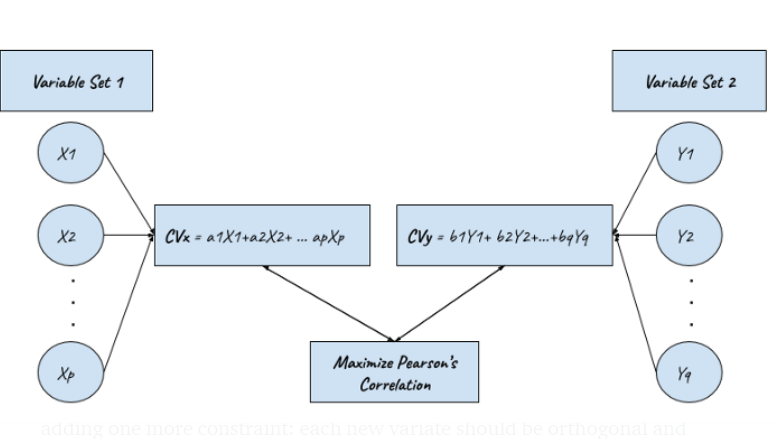

The Canonical Correlation Coefficient is the correlation between the canonical variates CVX and CVY. See above picture

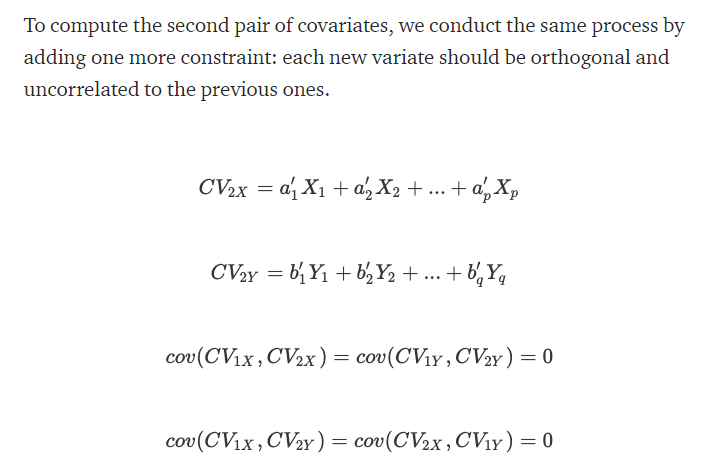

## play usint kaggle dataset (NYC schools dataset)  
__Group 1: Environment Metrics__
* Rigorous Instruction % : 엄격한 규율정도~
* Collaborative Teachers %
* Supportive Environment %
* Effective School Leadership %
* Family-Community Ties %
* Trust %  

__Group 2: Performance Metrics__
* Average ELA Proficiency
* Average Math Proficiency

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
df = pd.read_csv('D:/★2020_ML_DL_Project/Alchemy/dataset/datasets_2016 School Explorer.csv',encoding='UTF8')

In [2]:
print(df.shape)
# df.head(3)

(1272, 161)


본 예제에서는 cca analysis 를 보기 위해, 전처리과정은 최대한 간편하게 처리한다.

In [3]:
# choose relevant features
df = df[['Rigorous Instruction %','Collaborative Teachers %','Supportive Environment %','Effective School Leadership %','Strong Family-Community Ties %',\
         'Trust %','Average ELA Proficiency','Average Math Proficiency']]

In [4]:
# drop missing values
df = df.dropna()
# separate X and Y groups
X = df[['Rigorous Instruction %','Collaborative Teachers %','Supportive Environment %','Effective School Leadership %','Strong Family-Community Ties %',\
        'Trust %']]
Y = df[['Average ELA Proficiency','Average Math Proficiency']]

X,Y 그룹으로 나우어졌다  
Convert group X into numeric variables and standardise the data  
변수를 모두 표준화시키는 이유는 언급되지 않음.  

In [5]:
for col in X.columns:
    X[col] = X[col].str.strip('%')
    X[col] = X[col].astype('int')

# Standardise the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
X_sc = sc.fit_transform(X)
Y_sc = sc.fit_transform(Y)

In [39]:
# import pyrcca --> 바뀐듯
import rcca
nComponents = 2 # min(p,q) components
cca = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents,)

In [40]:
# train on data
cca.train([X_sc, Y_sc])
print('Canonical Correlation Per Component Pair:',cca.cancorrs)
print('% Shared Variance:',cca.cancorrs**2)

Training CCA, kernel = None, regularization = 0.0000, 2 components
Canonical Correlation Per Component Pair: [0.46059902 0.18447786]
% Shared Variance: [0.21215146 0.03403208]


__Cannonical Correlations__ : 두 쌍의 표준 변수에 대해, 우리는 각각 0.46과 0.18의 표준 상관 관계를 가지고 있다. 그러므로 학교 분위기와 학생들의 성적에 대한 잠재된 표현은 0.46이라는 긍정적인 상관관계를 가지고 있으며 21%의 분산을 공유한다.  
상기에서 나오는 0.46059902 0.18447786 은 집합의 잠재적 표현에 의한 공유 분산을 나타내며 변수 집합 자체에서 추론된 분산은 아니다.  

제 1정준상관계수 : 0.46059902  
제 2정준상관계수 : 0.18447786  
즉 두 집단간에는 0.4605 로 표현될수 있는 양의 상관관계가 있다고 할 수 있다.

원래 변수들에 사용된 가중치 위 그림에서는 (a1~ ap), (b1~ bq) 를 확인해보자

In [8]:
cca.ws

[array([[-0.00375779,  0.0078263 ],
        [ 0.00061439, -0.00357358],
        [-0.02054012, -0.0083491 ],
        [-0.01252477,  0.02976148],
        [ 0.00046503, -0.00905069],
        [ 0.01415084, -0.01264106]]),
 array([[ 0.00632283,  0.05721601],
        [-0.02606459, -0.05132531]])]

In [10]:
print(X_sc.shape,Y_sc.shape)

(1217, 6) (1217, 2)


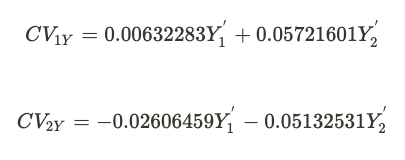

상기 그림은 CVx, CVy 를 만든 weight 이다.  원본 posting 에서는 상기 vector로 개별 변수들의 결과에 대한 영향력을 평가하는 것을 우려한다.  
다중공선성과, 계수값은 개별변수X - Y의 관계를 설명해줄 뿐이라서이다.  

따라서, 여기서는 canonical loadings 란 값을 사용한다.  

#### __Canonical loadings__  
Canonical loadings are nothing more than __the correlation between the original variable and the canonical variate of that set.__    
For example, to assess the contribution of Trust in school environment representation, we calculate the correlation between the variable Trust and the resulting variate for variable set X.  

변수 ```CVx(CV로 변환된) 와 원 Y변수(CY되기 전) 들의 상관계수 값```을 일컫는다. 하기 예를 통해서 보면

- CVX : cca.comps[0]  
- First CV for X : cca.comps[0][:,0]  
- Second CV for X : cca.comps[0][:,1]  
- CVY : cca.comps[1]  
- First CV for Y : cca.comps[1][:,0]  
- Second CV for Y : cca.comps[1][:,1]

In [23]:
## cca.comps : CV 로 변환된 Vector 들이다. 
print(type(cca.comps),len(cca.comps))
print(cca.comps[0].shape,cca.comps[1].shape)

<class 'list'> 2
(1217, 2) (1217, 2)


In [24]:
print(cca.comps[0][:,0].shape)
print(Y_sc[:,0].shape)

(1217,)
(1217,)


In [25]:
np.corrcoef(cca.comps[0][:,0],Y_sc[:,0])

array([[ 1.        , -0.41067781],
       [-0.41067781,  1.        ]])

In [26]:
np.corrcoef(cca.comps[0][:,0],Y_sc[:,1])

array([[ 1.       , -0.4578121],
       [-0.4578121,  1.       ]])

For example, to assess the contribution of Trust in school environment representation, we calculate the correlation between the variable Trust and the resulting variate for variable set X.

In [28]:
print('Loading for Math Score:',np.corrcoef(cca.comps[0][:,0],Y_sc[:,0])[0,1]) ## numpy.corrcoef() : pearson's correlation 구하는 함수
print('Loading for ELA Score:',np.corrcoef(cca.comps[0][:,0],Y_sc[:,1])[0,1])

Loading for Math Score: -0.4106778140971078
Loading for ELA Score: -0.4578120954218726


결론적으로 보면, CCA 는 개별변수들의 관계를 그리는 거이 아니라, 뭉뚱그려서, 종속변수에 어떤 영향을 주고 있는지를 보여주는 것 같다.  
위에서의 예시는 Trust 변수와 각각 의 Math, ELA score 에 대하 Canonical loadings을 보여주는 건데,  
Trust 변수에 대해서라고 얘기는 했지만, cca.comps[0]는 2개로 압축된 벡터(열) 밖에 없다. (1217,2) 헌데 이 중 첫번째 열로 Y 와의 관계를 상관계수를 보여줬다.

cca.cancorrs 에서, 전체적인 상관계수는 0.4605 로 나왔는데, 위 값에서는 -0.4106~ 이다.  
6개 Rigorous Instruction,Collaborative Teachers,Supportive Environment,Effective School Leadership,Family-Community Ties,Trust 는 Math,ELA학업성취도에  
표준환된 값으로 - 의 영향을 준다고 해석하는 것이 맞는것일까 하는 의문이 남는다.

In [34]:
# cca.comps[0][:,0]

**재해석01**  
이런 저런 자료를 찾아보고, 해석을 다시 해보면,  
Math Score: CVX 와 Math Score 의 상관계수이다. 즉 ```정준교차 부하량``` 으로 해석할 수 있다.  
그럼에도 불구하고, Loading 점수에 대한 해석은...잘 모르겠다.


**재해석02**  
위에서 cca.cancorrs 에서, 전체적인 상관계수는 0.4605 로 나왔다. 그리고, 이를 구성하는 CVx1 (제1정준계수 vector)의 계수값들은 하기 그림의 노랑색이다.  
변수순서를 고려하면, Trust가 그중 긍정적인 포션을 차지하고 있음을 알 수 있다. 헌데, medium posting 에서는 계수값에 대한 해석을 자제하고 했다는 점을 유념해야 한다.


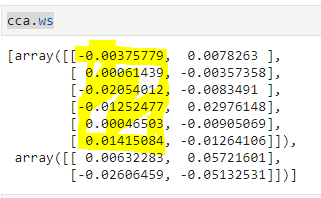

## X_sc 오리지널에, 정준상관계수 weight 구해진 행렬 역산하기

In [49]:
print(cca.ws[0].shape,X_sc.shape)

(6, 2) (1217, 6)


In [45]:
rslt = np.dot(X_sc,cca.ws[0])

In [46]:
rslt.shape

(1217, 2)

In [48]:
rslt[0:10]

array([[ 0.00521903,  0.01840999],
       [-0.03173083,  0.00669952],
       [ 0.02066659, -0.02319188],
       [ 0.028029  , -0.02119853],
       [ 0.01176716, -0.01290656],
       [-0.01774258, -0.00160147],
       [-0.03279749, -0.02305304],
       [ 0.00295108,  0.01560326],
       [ 0.00807717,  0.01956885],
       [ 0.00339074, -0.01307123]])

In [47]:
cca.comps[0][0:10]

array([[ 0.00521903,  0.01840999],
       [-0.03173083,  0.00669952],
       [ 0.02066659, -0.02319188],
       [ 0.028029  , -0.02119853],
       [ 0.01176716, -0.01290656],
       [-0.01774258, -0.00160147],
       [-0.03279749, -0.02305304],
       [ 0.00295108,  0.01560326],
       [ 0.00807717,  0.01956885],
       [ 0.00339074, -0.01307123]])

동일하다. 즉, cca.wx[0] 은 CVx1을 만들기 위한 계수가 맞다.